# Libraries

In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import arff
import datetime
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

## Data

https://www.kaggle.com/datasets/theforcecoder/wind-power-forecasting/data

In [ ]:
!unzip Turbine_Data.csv.zip

Archive:  Turbine_Data.csv.zip
  inflating: Turbine_Data.csv        


In [ ]:
df = pd.read_csv('Turbine_Data.csv')
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
df = df.set_index(['Time'])
df.sort_index(inplace=True)
df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
Time,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [ ]:
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [ ]:
df.drop(columns= ['WTG','Blade3PitchAngle','ControlBoxTemperature'], inplace=True)
w_df = df.resample('W').mean() # weekly aggregation
w_df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Time,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07 00:00:00+00:00,290.221865,25.344705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.241892,56.151211,NaN,NaN,280.241892,4.521882
2018-01-14 00:00:00+00:00,436.107014,25.451077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.785890,87.039212,NaN,NaN,285.785890,5.234919
2018-01-21 00:00:00+00:00,391.284108,25.513492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.801277,77.709782,NaN,NaN,286.801277,5.085697
2018-01-28 00:00:00+00:00,255.272892,25.593703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.985609,48.414566,NaN,NaN,284.985609,4.324437


In [ ]:
w_df.dropna(subset=['ActivePower'], inplace=True)
w_df.fillna(df.median(), inplace=True)
w_df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Time,,,,,,,,,,,,,,,,,,
2018-01-07 00:00:00+00:00,290.221865,25.344705,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,280.241892,56.151211,10.098702,2.0,280.241892,4.521882
2018-01-14 00:00:00+00:00,436.107014,25.451077,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,285.785890,87.039212,10.098702,2.0,285.785890,5.234919
2018-01-21 00:00:00+00:00,391.284108,25.513492,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,286.801277,77.709782,10.098702,2.0,286.801277,5.085697
2018-01-28 00:00:00+00:00,255.272892,25.593703,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,284.985609,48.414566,10.098702,2.0,284.985609,4.324437
2018-02-11 00:00:00+00:00,516.182456,26.308660,42.910877,0.394399,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,270.199643,103.292701,10.098702,2.0,270.199643,5.309276


In [ ]:
w_df.isnull().sum()

,0
ActivePower,0
AmbientTemperatue,0
BearingShaftTemperature,0
Blade1PitchAngle,0
Blade2PitchAngle,0
GearboxBearingTemperature,0
GearboxOilTemperature,0
GeneratorRPM,0
GeneratorWinding1Temperature,0
GeneratorWinding2Temperature,0


In [ ]:
df.dropna(subset=['ActivePower'], inplace=True)
df.fillna(df.median(), inplace=True)

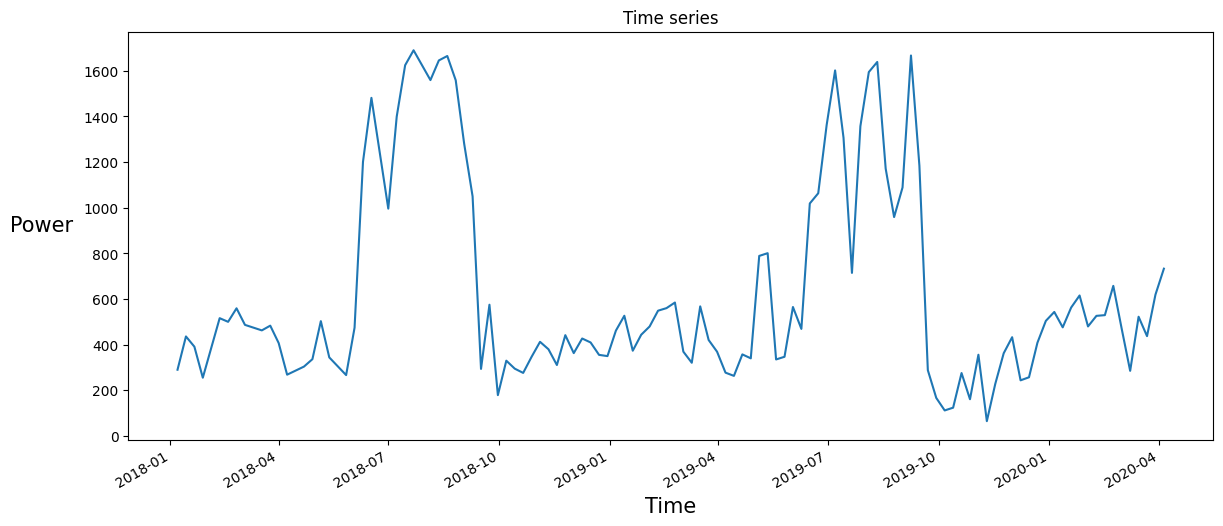

In [ ]:
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Power', rotation=0, labelpad=30, fontsize=15)
w_df['ActivePower'].plot();

In [ ]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2018-01-07 00:00:00+00:00 to 2020-04-05 00:00:00+00:00
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   112 non-null    float64
 1   AmbientTemperatue             112 non-null    float64
 2   BearingShaftTemperature       112 non-null    float64
 3   Blade1PitchAngle              112 non-null    float64
 4   Blade2PitchAngle              112 non-null    float64
 5   GearboxBearingTemperature     112 non-null    float64
 6   GearboxOilTemperature         112 non-null    float64
 7   GeneratorRPM                  112 non-null    float64
 8   GeneratorWinding1Temperature  112 non-null    float64
 9   GeneratorWinding2Temperature  112 non-null    float64
 10  HubTemperature                112 non-null    float64
 11  MainBoxTemperature            112 non-null    float64
 12  NacellePosition

In [ ]:
'''
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['ActivePower']], period=365)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);
'''

"\nfig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))\ndecompose = seasonal_decompose(df[['ActivePower']], period=365)\n\nax[0].set_title('Original')\nax[1].set_title('Trend')\nax[2].set_title('Seasonal')\nax[3].set_title('Residual')\n\ndecompose.observed.plot(ax=ax[0])\ndecompose.trend.plot(ax=ax[1])\ndecompose.seasonal.plot(ax=ax[2])\ndecompose.resid.plot(ax=ax[3]);\n"

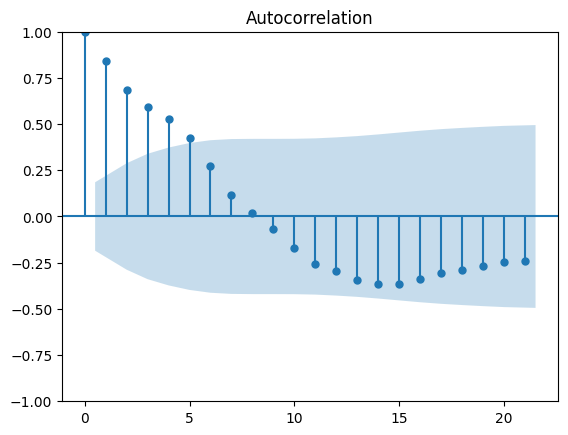

In [ ]:
plot_acf(w_df['ActivePower']);

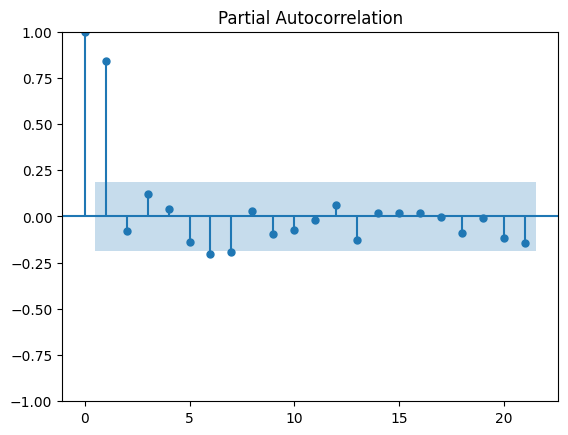

In [ ]:
plot_pacf(w_df['ActivePower']);

## Make the series stationary

weekly aggregated data

In [ ]:
# Augmented Dickey-Fuller (ADF) Test
result = adfuller(w_df['ActivePower'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.665554212393806
p-value: 0.004624596111456886


whole data

In [ ]:
result = adfuller(df['ActivePower'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -17.607071070139988
p-value: 3.8959855755072256e-30


weekly aggregated data

In [ ]:
# Applying differentiation to the 'ActivePower' column
w_df['active_power_diff'] = w_df['ActivePower'].diff().dropna()
result = adfuller(w_df['active_power_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -8.872546068269076
p-value: 1.3854217888703922e-14


whole data

In [ ]:
df['active_power_diff'] = df['ActivePower'].diff().dropna()
result = adfuller(df['active_power_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -52.35169542966068
p-value: 0.0


Plotting the differenced active power data

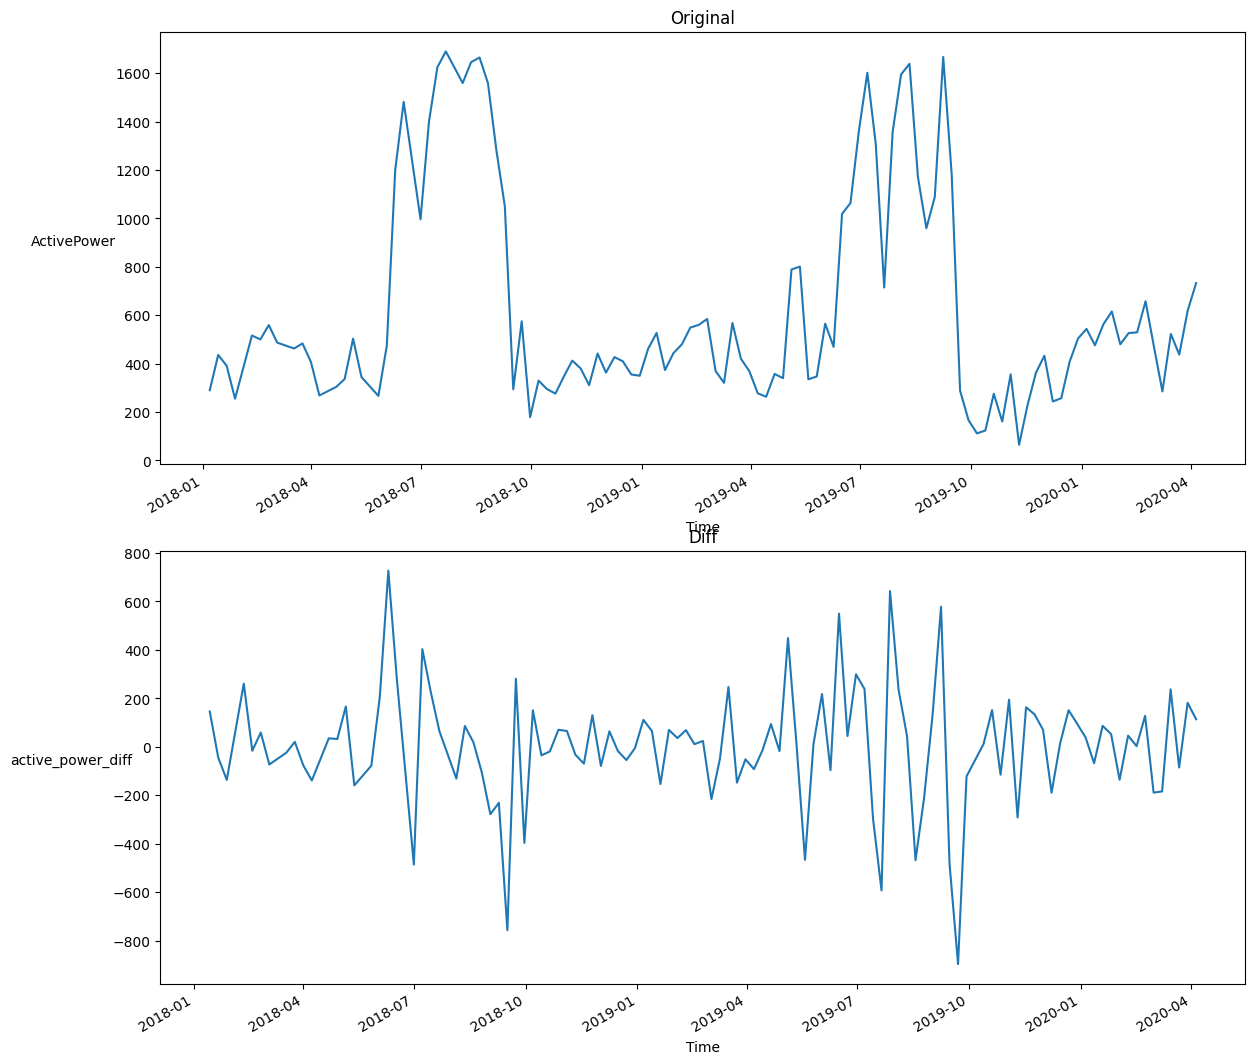

In [ ]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('ActivePower', rotation=0, labelpad=30)
w_df['ActivePower'].plot(ax=ax);


ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('active_power_diff', rotation=0, labelpad=30)
w_df['active_power_diff'].plot(ax=ax);

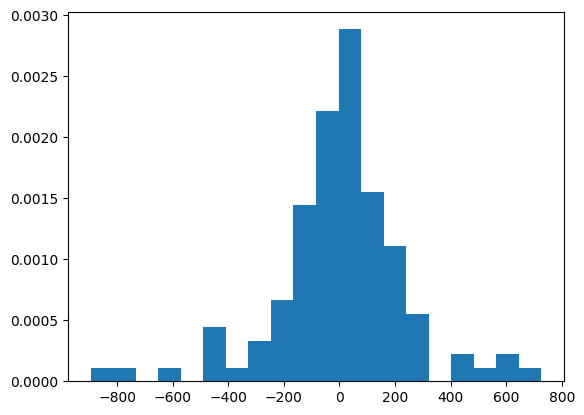

In [ ]:
plt.hist(w_df['active_power_diff'], density=True, bins=20);

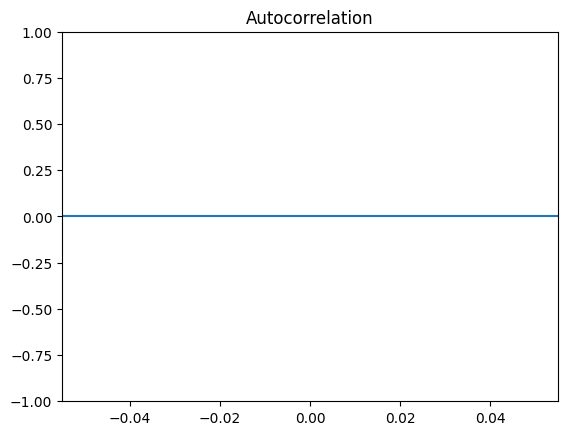

In [ ]:
#plot_acf(df['active_power_diff'],lags=60);
plot_acf(w_df['active_power_diff']);

In [ ]:
#df_clean['Time'] = df_clean['Time'].str[:10]

# Models

## Random forest

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth  # Maximum depth of the tree
        self.tree = None

    def _mse(self, y):
        """Calculate Mean Squared Error (MSE) of a set of target values."""
        return np.mean((y - np.mean(y)) ** 2)

    def _best_split(self, X, y):
        """Find the best split for the data based on minimizing MSE."""
        best_mse = float('inf')
        best_split = None
        best_left_y = None
        best_right_y = None

        # Iterate over all features
        for feature_idx in range(X.shape[1]):
            feature_values = X[:, feature_idx]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                left_mask = feature_values <= threshold
                right_mask = feature_values > threshold

                left_y = y[left_mask]
                right_y = y[right_mask]

                # Calculate MSE for this split
                mse_left = self._mse(left_y)
                mse_right = self._mse(right_y)
                mse = len(left_y) / len(y) * mse_left + len(right_y) / len(y) * mse_right

                # Update best split if current split is better
                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature_idx, threshold)
                    best_left_y = left_y
                    best_right_y = right_y

        return best_split, best_left_y, best_right_y

    def _build_tree(self, X, y, depth=0):
        """Recursively build a decision tree."""
        if len(set(y)) == 1:  # All targets are the same, no need to split further
            return {'value': np.mean(y)}

        if self.max_depth is not None and depth >= self.max_depth:
            return {'value': np.mean(y)}

        # Find the best split
        split, left_y, right_y = self._best_split(X, y)
        if split is None:
            return {'value': np.mean(y)}  # If no valid split, return the mean value

        feature_idx, threshold = split
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask

        # Recursively build the left and right subtrees
        left_tree = self._build_tree(X[left_mask], left_y, depth + 1)
        right_tree = self._build_tree(X[right_mask], right_y, depth + 1)

        return {'feature_idx': feature_idx, 'threshold': threshold, 'left': left_tree, 'right': right_tree}

    def fit(self, X, y):
        """Train the decision tree."""
        self.tree = self._build_tree(X, y)

    def _predict_one(self, tree, x):
        """Predict for a single sample."""
        if 'value' in tree:
            return tree['value']
        feature_value = x[tree['feature_idx']]
        if feature_value <= tree['threshold']:
            return self._predict_one(tree['left'], x)
        else:
            return self._predict_one(tree['right'], x)

    def predict(self, X):
        """Predict for all samples."""
        return np.array([self._predict_one(self.tree, x) for x in X])


In [ ]:
class RandomForest:
    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        """Train the random forest."""
        for _ in range(self.n_trees):
            # Bootstrapping: Sample with replacement
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """Make predictions by averaging the predictions of all trees."""
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)


prepare data

In [ ]:
w_df.dropna(inplace = True)
# extract the seasonality data
months = [x.month for x in w_df.index]
years = [x.year for x in w_df.index]
day = [x.day for x in w_df.index]

# convert into one matrix
X = np.array([day, months, years]).T
y = w_df['active_power_diff']

Testing

<ipython-input-17-36f19a4f883a>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_sample = y[indices]


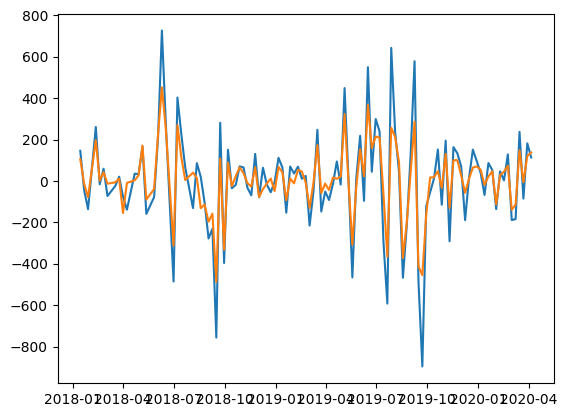

In [ ]:
# Train a Random Forest
forest = RandomForest(n_trees=50, max_depth=10)
forest.fit(X, y)

y_pred = forest.predict(X)
plt.plot(w_df.index, w_df['active_power_diff'])
plt.plot(w_df.index, y_pred)

Comparison

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
forest = RandomForest(n_trees=100, max_depth=10)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# from the library
model = RandomForestRegressor(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)
y_pred_lib = model.predict(X_test)

# MAPE
error = mean_absolute_percentage_error(y_test, y_pred)
error_lib = mean_absolute_percentage_error(y_test, y_pred_lib)

print(f'MAPE for custom RForest: {error:.2f}%')
print(f'MAPE for RandomForestRegressor: {error_lib:.2f}%')

MAPE for custom RForest: 1.19%
MAPE for RandomForestRegressor: 1.19%


Optimization

In [ ]:
def error(model, X, y, folds=6):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=22) # k=folds, split the data into k equal parts
    mse = []
    for train_index, valid_index in kfold.split(X):
      # Splitting Data
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model.fit(X_train, y_train)
        mse.append(mean_squared_error(y_test, model.predict(X_test)))

    return np.mean(mse)

def optimizer(X, y):
    best_score, best_params = 200000, None
    max_depth = [None, 10]
    n_trees = [50, 100]

    for depth in max_depth:
        for trees in n_trees:
                model = RandomForest(max_depth=depth, n_trees=trees)
                score = error(model, X, y)

                if score < best_score:
                    best_score = score
                    best_params = {'max_depth': depth, 'n_trees': trees}

    return best_params, best_score

In [ ]:
best_params, best_score = optimizer(X, y)

print("Best hyperparameters:", best_params)
print("MSE:", best_score)

Best hyperparameters: {'max_depth': 10, 'n_trees': 100}
MSE: 36285.783349684956


In [ ]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': 10, 'n_estimators': 100}


## Prophet

In [ ]:
def prophet_forecasting(traindays, trainy, testdays, testy):
    min_date_test = testdays.min()
    train_t = (traindays- min_date_test).dt.days
    test_t = (testdays - min_date_test).dt.days  # number of days since a reference point

    # seasonal decomposition to isolate the seasonal component
    decomposition = seasonal_decompose(trainy, period=30, model='additive')
    detrended = trainy - decomposition.seasonal

    # fit a linear regression model to predict the trend based on the 't' values
    trend_model = LinearRegression()
    trend_model.fit(pd.DataFrame(train_t), detrended)

    # Predict the trend on the test data, combine with the seasonal component to get final predictions
    seasonal = decomposition.seasonal[:len(testy)]
    trend = trend_model.predict(pd.DataFrame(test_t))
    y_pred = trend + seasonal  # Add the seasonal component

    return y_pred


Splitting the data

In [ ]:
w_df.dropna(inplace = True)
train, test = train_test_split(w_df.active_power_diff, train_size=60)
dftrain = pd.DataFrame(train)
dftest = pd.DataFrame(test)
dftrain['day'] = dftrain.index
dftrain = dftrain.reset_index(drop=True)
dftest['day'] = dftest.index
dftest = dftest.reset_index(drop=True)

In [ ]:
y_pred = prophet_forecasting(dftrain['day'], dftrain['active_power_diff'], dftest['day'], dftest['active_power_diff'])

In [ ]:
mape = mean_absolute_percentage_error(dftest['active_power_diff'], y_pred)

print(f"MAPE (Scratch Model): {mape:.2f}%")

MAPE (Scratch Model): 2.14%


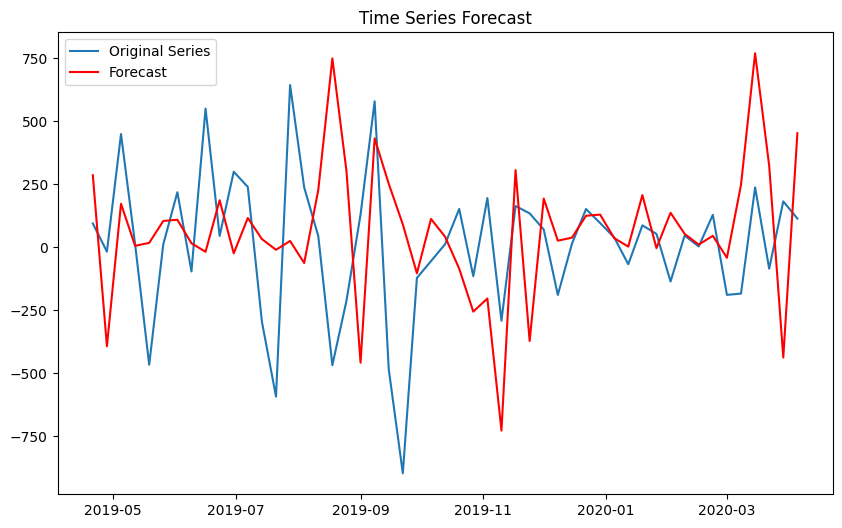

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dftest['day'], dftest['active_power_diff'], label='Original Series')
plt.plot(dftest['day'], y_pred, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('Time Series Forecast')
plt.show()

library prophet

In [ ]:
from prophet import Prophet

dftrain = dftrain.rename(columns={'day': 'ds', 'active_power_diff': 'y'})
dftest = dftest.rename(columns={'day': 'ds', 'active_power_diff': 'y'})
dftrain['ds'] = dftrain['ds'].dt.tz_localize(None)
dftest['ds'] = dftest['ds'].dt.tz_localize(None)
model_prophet = Prophet()
model_prophet.fit(dftrain)

future = pd.DataFrame({'ds': dftest['ds']})
forecast = model_prophet.predict(future)

y_pred_prophet = forecast['yhat'].values
y_test = dftest['y'].values

# Evaluate Prophet's MAPE
mape_prophet = mean_absolute_percentage_error(y_test, y_pred_prophet)
print(f"MAPE (Prophet Model): {mape_prophet:.2f}%")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwyqixyrf/a6ujdl6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwyqixyrf/no9cg4dy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1593', 'data', 'file=/tmp/tmpwyqixyrf/a6ujdl6t.json', 'init=/tmp/tmpwyqixyrf/no9cg4dy.json', 'output', 'file=/tmp/tmpwyqixyrf/prophet_model_btgo_71/prophet_model-20241128215801.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:58:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:58:01 - cmdstanpy - INFO - Chain

MAPE (Prophet Model): 2.00%
